# Connecting Colab with my Googe Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading data from my Drive

In [2]:
import numpy as np

X_train=np.loadtxt("/content/drive/MyDrive/input.csv",delimiter=",")
y_train=np.loadtxt("/content/drive/MyDrive/labels.csv",delimiter=",")

X_test=np.loadtxt("/content/drive/MyDrive/input_test.csv",delimiter=",")
y_test=np.loadtxt("/content/drive/MyDrive/labels_test.csv",delimiter=",")

In [3]:
# Prepearing the data
X_train = X_train.reshape(len(X_train),100,100,3) / 255.0
y_train= y_train.reshape(len(y_train),1)

X_test= X_test.reshape(len(X_test),100,100,3) / 255.0
y_test= y_test.reshape(len(y_test),1)

# Exploring the dataset

In [4]:
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (2000, 100, 100, 3)
Training labels shape: (2000, 1)
Testing data shape: (400, 100, 100, 3)
Testing labels shape: (400, 1)


# Showing random datapoints

<function matplotlib.pyplot.show(close=None, block=None)>

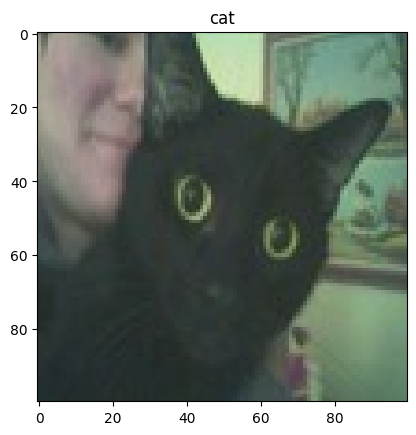

In [5]:
import matplotlib.pyplot as plt
import random

idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])

if y_train[idx,:]==[1.]:
    label = "cat"
else:
    label = "dog"

plt.title(label)
plt.show

#Model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(), #7744 features
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
29/29 [==============================] - 2s 27ms/step - loss: 0.7994 - accuracy: 0.5211 - val_loss: 0.7581 - val_accuracy: 0.0000e+00
Epoch 2/10
29/29 [==============================] - 1s 18ms/step - loss: 0.6737 - accuracy: 0.5750 - val_loss: 0.7005 - val_accuracy: 0.5400
Epoch 3/10
29/29 [==============================] - 0s 17ms/step - loss: 0.6476 - accuracy: 0.6328 - val_loss: 0.7543 - val_accuracy: 0.3900
Epoch 4/10
29/29 [==============================] - 1s 18ms/step - loss: 0.6042 - accuracy: 0.6739 - val_loss: 0.7207 - val_accuracy: 0.4950
Epoch 5/10
29/29 [==============================] - 1s 20ms/step - loss: 0.5519 - accuracy: 0.7250 - val_loss: 1.2073 - val_accuracy: 0.2650
Epoch 6/10
29/29 [==============================] - 1s 22ms/step - loss: 0.5308 - accuracy: 0.7311 - val_loss: 0.5608 - val_accuracy: 0.7300
Epoch 7/10
29/29 [==============================] - 1s 21ms/step - loss: 0.5021 - accuracy: 0.7467 - val_loss: 0.7263 - val_accuracy: 0.5750
Epoch 8/1

In [32]:
model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 5ms/step - loss: 0.5943 - accuracy: 0.6850


[0.5942550897598267, 0.6850000023841858]

#Evaluating the model

In [33]:
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.where(y_pred >= 0.5, 1, 0)

13/13 [==============================] - 0s 6ms/step


In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# For accuracy measurement
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

# For confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(confusion_matrix)

# For classification report
classification_report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(classification_report)

Accuracy: 0.685
Confusion Matrix:
[[121  79]
 [ 47 153]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.60      0.66       200
         1.0       0.66      0.77      0.71       200

    accuracy                           0.69       400
   macro avg       0.69      0.69      0.68       400
weighted avg       0.69      0.69      0.68       400



#Making random predictions

1/1 [==============================] - 0s 29ms/step
Predicted as dog


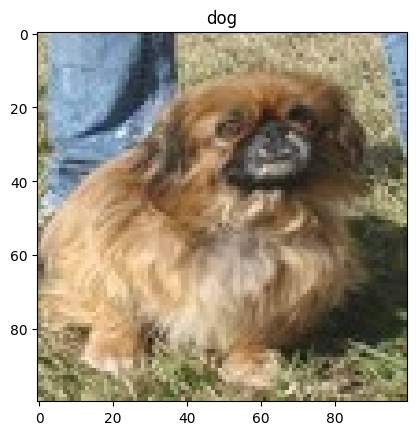

In [37]:
import matplotlib.pyplot as plt
import random

idx2 = random.randint(0,len(y_test))
plt.imshow(X_test[idx2,:])
if y_test[idx2,:]==[1.]:
    label = "cat"
else:
    label = "dog"
plt.title(label)
plt.show

y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
if y_pred >= 0.5:
    label = "cat"
else:
    label = "dog"
print("Predicted as",label)